## Imports

In [1]:
# Basic Imports
import pandas as pd
import numpy as np

# Visualization Imports
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn impots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

# Tensorflow imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('/kaggle/input/lendingclubkerasprojectdata/pre-processed.csv', index_col = 'Unnamed: 0')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   earliest_cr_line                     395219 non-null  int64  
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

In [4]:
(df.corr()>0.7).sum().sort_values(ascending = False)

loan_amnt                       2
installment                     2
verification_status_Verified    1
purpose_home_improvement        1
purpose_educational             1
                               ..
C3                              1
C2                              1
C1                              1
B5                              1
93700                           1
Length: 79, dtype: int64

In [5]:
df.drop('installment', axis = 1, inplace = True)

In [6]:
# Separating Independent and Dependent Variables
X = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values

In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [8]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

In [9]:
X_train.shape

(316175, 77)

In [10]:
model = Sequential()

model.add(Dense(77, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(38, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

2022-12-24 16:57:29.365737: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
early_stop = EarlyStopping(patience = 25, monitor = 'val_loss', mode = 'max')

model.fit(X_train, y_train, callbacks = [early_stop], validation_data = (X_test, y_test), 
         epochs = 25, batch_size = 256)

2022-12-24 16:57:29.602960: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.3055 - val_loss: 0.2642
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2677 - val_loss: 0.2635
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2642 - val_loss: 0.2618
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2623 - val_loss: 0.2616
Epoch 5/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2619 - val_loss: 0.2613
Epoch 6/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.2614 - val_loss: 0.2615
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2606 - val_loss: 0.2613
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2604 - val_loss: 0.2615
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2601 - val_loss: 0.2611
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.259

<AxesSubplot:>

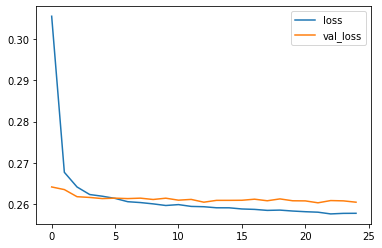

In [12]:
hist = pd.DataFrame(model.history.history)
hist.plot()

In [13]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype('int')

In [14]:
print(classification_report(y_pred, y_test))
print('\n')
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.43      0.98      0.60      6864
           1       1.00      0.88      0.93     72180

    accuracy                           0.89     79044
   macro avg       0.72      0.93      0.77     79044
weighted avg       0.95      0.89      0.91     79044



[[ 6745   119]
 [ 8827 63353]]


In [15]:
model.save('LC - WithOutSampling.h5')

# Checking if sampling can increase the F1-score

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   annual_inc                           395219 non-null  float64
 4   dti                                  395219 non-null  float64
 5   earliest_cr_line                     395219 non-null  int64  
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  mort_acc     

In [17]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [18]:
m_df = df[df['loan_repaid'] == 1]
l_df = df[df['loan_repaid'] == 0]

In [19]:
m = m_df.sample(77523)
train_m = m[:70000]
test_m = m[70000:]
l = l_df.sample(77523)
train_l = l[:70000]
test_l = l[70000:]

In [20]:
train_df = pd.concat([train_m, train_l], axis = 0)
test_df = pd.concat([test_m, test_l], axis = 0)

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140000 entries, 338145 to 183984
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            140000 non-null  float64
 1   term                                 140000 non-null  int64  
 2   int_rate                             140000 non-null  float64
 3   annual_inc                           140000 non-null  float64
 4   dti                                  140000 non-null  float64
 5   earliest_cr_line                     140000 non-null  int64  
 6   open_acc                             140000 non-null  float64
 7   pub_rec                              140000 non-null  float64
 8   revol_bal                            140000 non-null  float64
 9   revol_util                           140000 non-null  float64
 10  total_acc                            140000 non-null  float64
 11  mort_acc

In [22]:
# Separating Independent and Dependent Variables
X = train_df.drop('loan_repaid', axis = 1).values
y = train_df['loan_repaid'].values

In [23]:
# Separating Independent and Dependent Variables
X_test = test_df.drop('loan_repaid', axis = 1).values
y_test = test_df['loan_repaid'].values

In [24]:
# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [25]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [26]:
X_train.shape

(112000, 77)

In [27]:
model_2 = Sequential()

model_2.add(Dense(77, activation = 'relu'))
model_2.add(Dropout(0.3))

model_2.add(Dense(70, activation = 'relu'))
model_2.add(Dropout(0.3))

model_2.add(Dense(40, activation = 'relu'))
model_2.add(Dropout(0.3))

model_2.add(Dense(25, activation = 'relu'))
model_2.add(Dropout(0.3))

model_2.add(Dense(1, activation = 'sigmoid'))

model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
early_stop = EarlyStopping(patience = 5, monitor = 'val_accuracy', mode = 'max')

model_2.fit(X_train, y_train, callbacks = [early_stop], validation_data = (X_val, y_val), 
         epochs = 50, batch_size = 256)

Epoch 1/50
438/438 [==============================] - 3s 6ms/step - loss: 0.4598 - accuracy: 0.7401 - val_loss: 0.3733 - val_accuracy: 0.7922
Epoch 2/50
438/438 [==============================] - 2s 5ms/step - loss: 0.3753 - accuracy: 0.7863 - val_loss: 0.3678 - val_accuracy: 0.7941
Epoch 3/50
438/438 [==============================] - 2s 5ms/step - loss: 0.3684 - accuracy: 0.7936 - val_loss: 0.3651 - val_accuracy: 0.7940
Epoch 4/50
438/438 [==============================] - 3s 7ms/step - loss: 0.3653 - accuracy: 0.7960 - val_loss: 0.3646 - val_accuracy: 0.7955
Epoch 5/50
438/438 [==============================] - 3s 7ms/step - loss: 0.3645 - accuracy: 0.7959 - val_loss: 0.3635 - val_accuracy: 0.7956
Epoch 6/50
438/438 [==============================] - 3s 6ms/step - loss: 0.3632 - accuracy: 0.7986 - val_loss: 0.3627 - val_accuracy: 0.7968
Epoch 7/50
438/438 [==============================] - 3s 6ms/step - loss: 0.3628 - accuracy: 0.7980 - val_loss: 0.3627 - val_accuracy: 0.7962
Epoch 

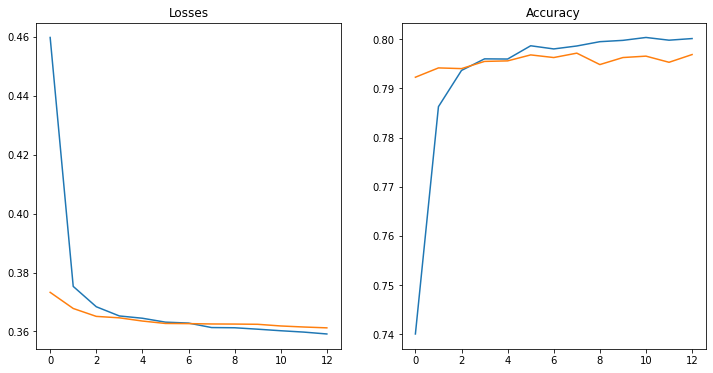

In [29]:
f, a = plt.subplots(1, 2, figsize=(12, 6))
hist = pd.DataFrame(model_2.history.history)
a[0].plot(hist[['loss', 'val_loss']])
a[0].set_title('Losses')
a[1].plot(hist[['accuracy', 'val_accuracy']])
a[1].set_title('Accuracy')
plt.show()

In [30]:
y_pred = model_2.predict(X_val)
y_pred = np.round(y_pred).astype('int')

In [31]:
print(classification_report(y_pred, y_val))
print('\n')
print(confusion_matrix(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     14320
           1       0.79      0.80      0.79     13680

    accuracy                           0.80     28000
   macro avg       0.80      0.80      0.80     28000
weighted avg       0.80      0.80      0.80     28000



[[11356  2964]
 [ 2724 10956]]


In [32]:
pred = model_2.predict(X_test)
pred = np.round(pred).astype('int')

In [33]:
print(classification_report(pred, y_test))
print('\n')
print(confusion_matrix(pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      7637
           1       0.79      0.80      0.80      7409

    accuracy                           0.80     15046
   macro avg       0.80      0.80      0.80     15046
weighted avg       0.80      0.80      0.80     15046



[[6067 1570]
 [1456 5953]]


In [35]:
model_2.save('LC - WithSampling.h5')